Predicción de gastos médicos usando regresión lineal --- 14:40 min
===

* 14:40 min | Ultima modificación: Abril 13, 2021 | [YouTube](https://youtu.be/6X2AzhZ7hA8)

En este tutorial se construye un modelo de regresión lineal para la predicción de gastos médicos por parte de una aseguradora.

## Descripción del problema

Una compañía de seguros desea pronósticar los gastos médicos de la población asegurada con el fin de recolectar un valor superior en ingresos, tal que le permita obtener utilidades. Los costos son difíciles de pronósticar ya que las condiciones más costosas son más raras y parecen aleatorias; y que ciertas condiciones son más probables para ciertos segmentos de la población (infarto en personas obesas y cáncer en fumadores).

El objetivo es usar una base de datos con 1338 registros de gastos médicos hipotéticos para pacientes de EU con el fin de estimar los costos para determinados segmentos de la población. La información registrada es la siguiente:

* Age: entero hasta 64.

* Sex: male, female.

* bmi: Body mass index.

* children: entero indicando la cantidad de hijos/dependientes cubiertos por el plan de salud.

* smoker: yes, no.

* region: northest, southeast, southwest, northwest.

* charges: costos.


In [1]:
import warnings

warnings.filterwarnings("ignore")

## Lectura de datos

In [2]:
import pandas as pd

#
# Lectura del archivo y verificación
#
df = pd.read_csv(
    "https://raw.githubusercontent.com/jdvelasq/datalabs/master/datasets/insurance.csv",
    sep=",",  # separador de campos
    thousands=None,  # separador de miles para números
    decimal=".",  # separador de los decimales para números
)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#
# Tipos de las columnas.
#
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## Análisis exploratorio

In [4]:
#
# Estadísticos descriptivos de las variables
#
#  Información estadística de la variable dependiente.
#  Se busca cualquier indicio de irregularidades,
#  especialmente datos atípicos, información faltante, etc.
#
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


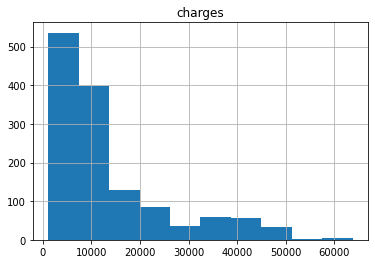

In [5]:
#
# histograma.
#  Muestra que la mayor parte de la población tiene
#  gastos bajos, mientras que disminuye la frecuencia
#  de costos más altos es más baja.
#
df.hist(column="charges");

In [6]:
#
# Se evalua la cantidad de casos por región.
#  Todas las regiones tienen aproximadamente
#  la misma cantidad de casos.
#
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [7]:
#
# El análisis de correlación muestra que
#  existe una mayor correlación de los gastos
#  con la edad y el bmi, pero no con la
#  cantidad de dependientes.
#
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


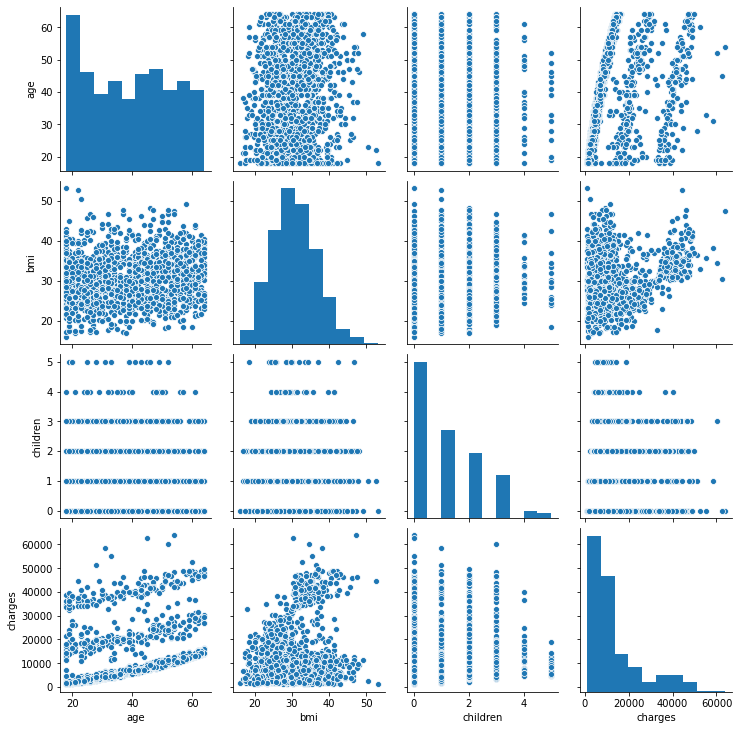

In [8]:
#
# Se construye la siguiente gráfica para
#  visualizar relaciones entre las variables
#
import seaborn as sns

sns.pairplot(df)

#
# la gráfica muestra una relación entre age y charges,
# y dos grupos para bmi y charges.
#

## Preprocesamiento

In [9]:
#
# Las columnas sex, smoker, region son strings.
# Se convierten a variables categoricas
#
from sklearn import preprocessing

#
# Entrena los codificadores
#
encoder_sex = preprocessing.LabelEncoder().fit(df.sex)
encoder_smoker = preprocessing.LabelEncoder().fit(df.smoker)
encoder_region = preprocessing.LabelEncoder().fit(df.region)

#
# Genera las variables transformadas
#
df["sex_factor"] = encoder_sex.transform(df.sex)
df["smoker_factor"] = encoder_smoker.transform(df.smoker)
df["region_factor"] = encoder_region.transform(df.region)

In [10]:
df.dtypes

age                int64
sex               object
bmi              float64
children           int64
smoker            object
region            object
charges          float64
sex_factor         int64
smoker_factor      int64
region_factor      int64
dtype: object

## Entrenamiento del modelo

In [11]:
#
# Se usa la función LinearRegresion() para
# estimar el modelo de regresión lineal.
#
from sklearn import linear_model

# Crea el modelo
regr = linear_model.LinearRegression()

# Obtiene las variables independientes
x = df[
    [
        "age",
        "bmi",
        "children",
        "sex_factor",
        "smoker_factor",
        "region_factor",
    ]
]

# Obtiene la variable dependientes
y = df[["charges"]]

# Calibra el modelo
regr.fit(x, y)

# Imprime los coeficientes
print("Coeficientes: ", regr.coef_)

# Imprime el intercepto
print("\nIntercepto: ", regr.intercept_)

Coeficientes:  [[  257.28807486   332.57013224   479.36939355  -131.11057962
  23820.43412267  -353.64001656]]

Intercepto:  [-11815.45232123]


In [12]:
#
# Pronostico para los datos de calibración
#
y_pred = regr.predict(x)
y_pred

array([[25111.24186363],
       [ 3687.60517284],
       [ 6963.14570669],
       ...,
       [ 4363.66236622],
       [ 1106.98661296],
       [37013.72809551]])

## Métricas de error

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# MSE
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))

# R2
print("Variance score: %.2f" % r2_score(y, y_pred))

Mean squared error: 36527659.89
Variance score: 0.75


## Pronóstico con statmodels

In [14]:
#
# Regresión usando statsmodels con formulas como en R
#
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Ajusta el modelo
mod = smf.ols(
    formula="charges ~ age + bmi + children + sex_factor + smoker_factor + region_factor",
    data=df,
)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:12:01   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.182e+04    955.130    -12.371

In [15]:
#
# Parámetros del modelo
#
res.params

Intercept       -11815.452321
age                257.288075
bmi                332.570132
children           479.369394
sex_factor        -131.110580
smoker_factor    23820.434123
region_factor     -353.640017
dtype: float64

In [16]:
#
# Predicción
#
res.predict(df).head()

0    25111.241864
1     3687.605173
2     6963.145707
3     3741.308405
4     5537.640897
dtype: float64

**Actividad.---** Elimine las variables no significativas.

**Actividad.---** Realice este ejercicio realizando ridge regression.

**Actividad.---** Realice este ejercicio usando LASSO. 

**Actividad.---** Evalue si sería de utilidad usar transformación de variables. 